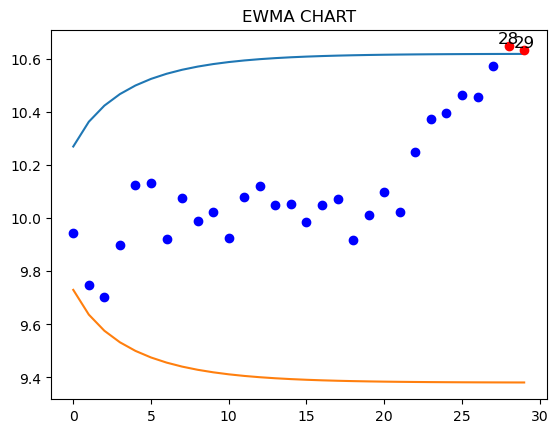

In [131]:
import matplotlib.pyplot as plt
import tkinter as tk
import pandas as pd
import array as arr
import math

loc = ("C:/Users/Ohyp/Desktop/a/test/data2.xlsx")
lambda_v = 0
l_value = 0
m0 = 0
m0cons = 0
j = 0
xi_values = []
zi_values = []
maxvalue = []
minvalue = []

def get_excel_data():
    df = pd.read_excel(loc)
    for i in df["data"]:
        xi_values.append(i)
        
def calculate_zi_value():
    global m0
    index = 1
    for i in xi_values:
        zi_values.append((i * lambda_v) + (1 - lambda_v) * m0)
        maxvalue.append(calculate_max_bound(m0,index))
        minvalue.append(calculate_min_bound(m0,index))
        m0 = zi_values[-1]
        index += 1

        
def calculate_max_bound(mvalue,x):
    return m0cons + (l_value * j * math.sqrt((lambda_v / (2 - lambda_v))*(1-(math.pow(1-lambda_v,2*x)))))


#Bu metot calculate_zi_value metotu tarafından çağırılıp alt sınır verilerini hesaplamak için kullanılıyor. Bulunan veriler çağırılan yere döndürülür.
def calculate_min_bound(mvalue,x):
    return m0cons - (l_value * j * math.sqrt((lambda_v / (2 - lambda_v))*(1-(math.pow(1-lambda_v,2*x)))))

def clear_all_parameters():
    xi_values = []
    zi_values = []
    maxvalue = []
    minvalue = []
    plt.close(1)   
    
#Bu metot Kullanıcı giriş ekranındaki verileri doldurduktan ve butona bastıktan sonra gerekli metotları ve parametre ayarlamalarını yapmak için kullanılıyor.
def show_entry_fields():
    global lambda_v, l_value, m0, j,m0cons
    clear_all_parameters()
    a = e1.get()
    lambda_v = e1.getdouble(a)
    a = e2.get()
    l_value = e2.getdouble(a)
    a = e3.get()
    j = e3.getdouble(a)
    a = e4.get()
    m0 = e4.getdouble(a)
    m0cons = e4.getdouble(a)
    get_excel_data()
    calculate_zi_value()
    plt.title("EWMA CHART")
    plt.plot(maxvalue)
    plt.plot(minvalue)
    
    for i in range(len(zi_values)):
        if zi_values[i] > maxvalue[i] or zi_values[i] < minvalue[i]:
            plt.plot(i, zi_values[i], '-ro', markersize=6) 
            plt.text(i, zi_values[i], str(i), color='black', fontsize=12, ha='center', va='bottom')  # Index değerini göster
        else:
            plt.plot(i, zi_values[i], '-bo', markersize=6)  
    
    #plt.plot([5,10],[10,10], 'rs-')
    #plt.plot([10,20],[10,10], color = 'blue')
    plt.show()
    
master = tk.Tk()
master.title("EWMA CHART")
tk.Label(master, text="Lamda Value").grid(row=0)
tk.Label(master, text="L Value").grid(row=1)
tk.Label(master, text="R Value").grid(row=2)
tk.Label(master, text="M0 Value").grid(row=3)
e1 = tk.Entry(master)
e2 = tk.Entry(master)
e3 = tk.Entry(master)
e4 = tk.Entry(master)
e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
tk.Button(master, text='EXIT', command=master.quit).grid(row=5, column=0, sticky=tk.W, pady=5)
tk.Button(master, text='DRAW GRAPH', command=show_entry_fields).grid(row=5, column=1, sticky=tk.W, pady=5)
tk.Label(master, text="Lütfen '.' işaretini kullanınız").grid(row=4)
#*/-*/-*/-*/-*/-*/-*/-*/-*/-*//-

# ANA DÖNGÜYÜ ÇAĞIRIR
tk.mainloop()